In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [19]:
## SET SNS DEFAULTS
from matplotlib import rcParams
rcParams['figure.figsize']= 11.7, 8.27
sns.set_style('white', rc = {"lines.linewidth":50})
sns.set_theme(context = 'paper', style = 'white', palette = 'seismic', font = 'Liberation Serif', font_scale = 3)

In [20]:
FOLDER = './'
# cifar



# CIFAR-10
df = pd.read_csv(FOLDER + 'cifar10.csv')

# Exclude a particular defense
df = df.drop(df[df['def_name'] == 'Class Labels'].index)

# Exclude cases with few samples
df = df[df.attack_size.astype('int') >= 100]

# Change column name
try:
    df['atk_name'] = df.attack_name
    df.drop(['attack_name'], axis = 1, inplace = True)
    df.fillna(method = 'ffill', inplace = True)
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)
except:
    print('Columns already named correctly')


# Enable for Cifar-10
# Specify the control


df.def_name.replace('Confident-prob:0.5', 'ArgMax', inplace = True)



In [21]:
for column in df.columns:
    df[column].replace("Skip", np.nan, inplace = True)

In [22]:
# Parses attack/defense type from full name
defenses = df.def_name
new_names = []
for defense in defenses:
    new = str(defense).split("-")[0]
    new_names.append(new)
df['def_gen'] = new_names

attacks= df.atk_name 
new_names = []
for attack in attacks:
    new = str(attack).split("-")[0]
    new_names.append(new)
df['atk_gen'] = new_names

df['ben_pred_time'] = np.divide(df['ben_pred_time'].astype(float), 10000)
df['attack_time'] = np.divide(df['adv_pred_time'].astype(float), df['attack_size'].astype(float))

df['train_time'] = np.divide(df['train_time'], df['n'])
df['total_train_time'] = np.add(df['train_time'], df['ben_pred_time'])

print(set(df.atk_gen))
print(set(df.def_gen))

{'HSJ', 'Patch', 'Thresh', 'PGD', 'FGM', 'Pixel', 'CW', 'Deep'}
{'Label', 'SPS', 'Control', 'Round', 'FSQ', 'TVM', 'Sigmoid', 'Conf', 'Gauss'}


In [23]:
# Makes the data sns friendly
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['ben_acc', 'adv_acc'])

# Creates a red/blue color palette
binary_palette = sns.color_palette("seismic", 2)

In [24]:
for defense in df.def_name.unique():
    perf = np.mean(df[df.def_name == defense].ben_acc)
    print(defense, perf)
    

Label-sigma:0.99 0.9493
Sigmoid-gamma:1-beta:0.01 0.9500000000000001
FSQ-bit_depth:4 0.09999999999999995
FSQ-bit_depth:32 0.9365000000000003
SPS-size:2 0.9015000000000001
Gauss-Out-scale:0.1 0.9500000000000004
Label-sigma:0.9 0.9493000000000001
Sigmoid-gamma:100-beta:100 0.0056
Sigmoid-gamma:0.01-beta:0.01 0.9500000000000002
Sigmoid-gamma:0.01-beta:100 0.0017
Sigmoid-gamma:0.01-beta:1 0.95
TVM-prob:0.1 0.1057
Round-decimals:3 0.95
Sigmoid-gamma:1-beta:100 0.0056
FSQ-bit_depth:16 0.9498
Sigmoid-gamma:100-beta:0.01 0.95
Round-decimals:6 0.95
Label-sigma:0.5 0.9492
FSQ-bit_depth:8 0.6454999999999999
SPS-size:3 0.7984999999999995
Gauss-Out-scale:0.5 0.95
TVM-prob:0.01 0.1065
Gauss-Out-scale:0.3 0.95
SPS-size:4 0.6611
Sigmoid-gamma:100-beta:1 0.0527
Label-sigma:0.1 0.9492
Sigmoid-gamma:1-beta:1 0.10069999999999997
TVM-prob:0.001 0.1044
Round-decimals:9 0.95
Round-decimals:1 0.9498999999999999
TVM-prob:0.3 0.10329999999999998
Gauss-In-sigma:0.99 0.10239999999999999
Conf-cutoff:0.99 0.671044


# Plotting
## Benign and Adversarial Accuracy

In [25]:
# df['Benign Accuracy'] = df.ben_acc
# df['Adversarial Accuracy'] = df.adv_acc
# melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Accuracy', 'Adversarial Accuracy'])
# # fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
# # fig.suptitle("Accuracy for each Defense and Attack Type")
# plt.subplots()
# sns.catplot(data = melted, x = 'def_gen', y = 'value', hue = 'variable', kind = 'bar', legend = False, height = 10, palette = binary_palette, ax = ax1)
# plt.xticks(rotation =90);
# plt.title("Defense Type vs Accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("")
# plt.legend()
# plt.tight_layout()
# plt.savefig("cifar10/def_acc.eps", format = "eps")
# sns.catplot(data = melted, x = 'atk_gen', y = 'value', hue = 'variable', kind = 'bar', legend = False, height = 10, palette = binary_palette, ax = ax2)
# plt.xticks(rotation =90);
# plt.title("Attack Type vs Accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("")
# plt.legend()
# plt.tight_layout()
# plt.show()
# plt.savefig("cifar10/atk_acc.eps", format = "eps")
# del melted


/tmp/ipykernel_297808/661079777.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
/tmp/ipykernel_297808/661079777.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)


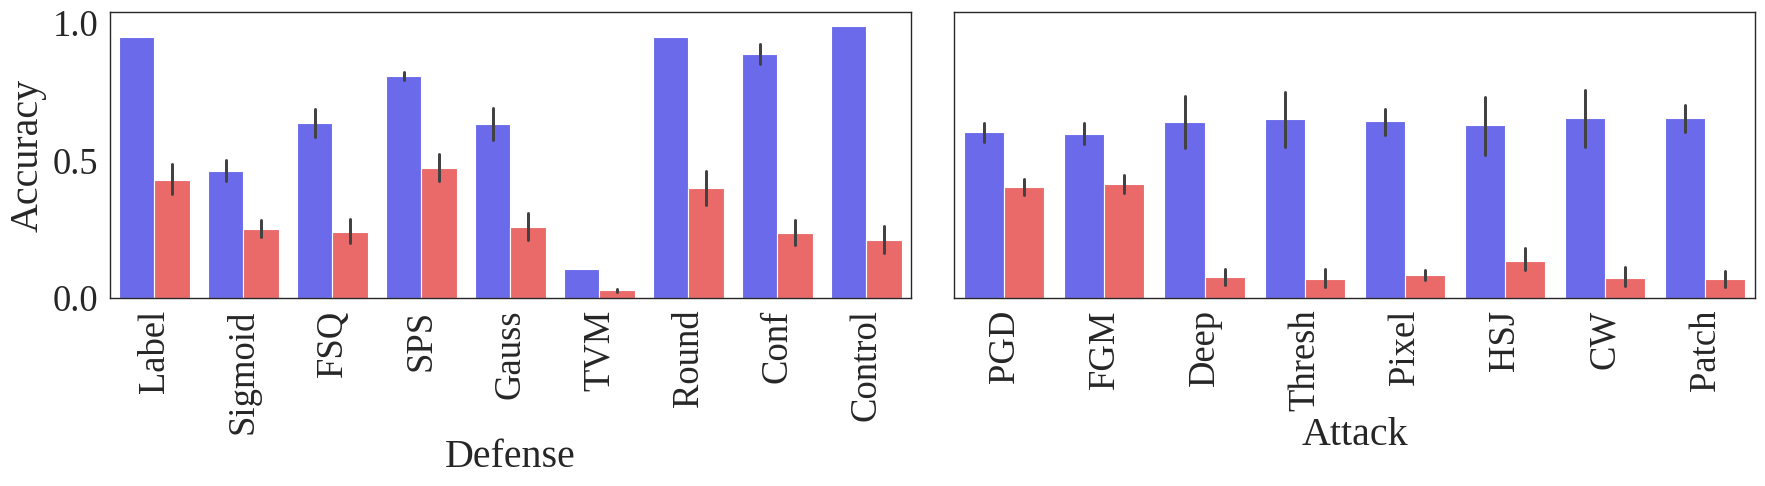

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Benign Accuracy'] = df.ben_acc
df['Adversarial Accuracy'] = df.adv_acc
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Accuracy', 'Adversarial Accuracy'])

fig, axs = plt.subplots(1, 2, sharey = True)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Accuracy")
axs[0].legend_ = None
# axs[0].set_aspect(2.0)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
# axs[1].set_aspect(2.0)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig("cifar10/accuracy_plot.eps", format = "eps")





## Training and Prediction times in Benign/Adversarial circumstances

/tmp/ipykernel_297808/3633147635.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
/tmp/ipykernel_297808/3633147635.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)


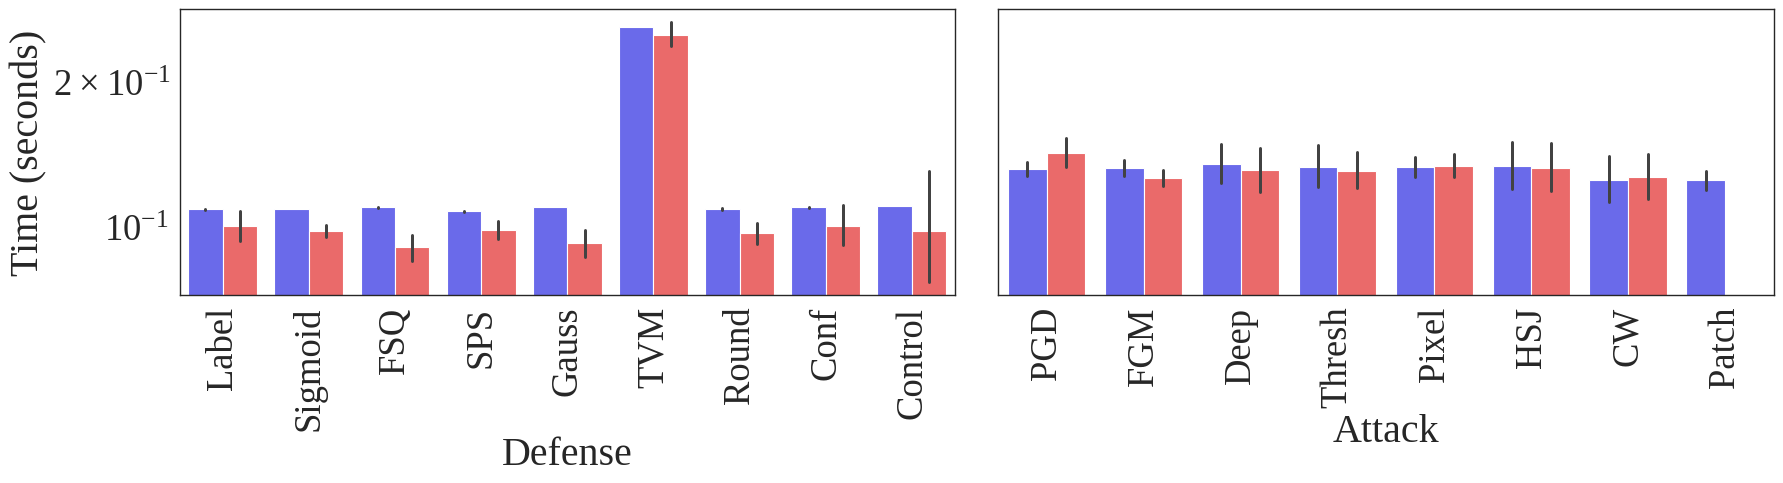

In [27]:
df['Benign Prediction Time'] = df.ben_pred_time
df['Attack Time'] = df.attack_time
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Prediction Time', 'Attack Time'])


# df['Benign Accuracy'] = df.ben_acc
# df['Adversarial Accuracy'] = df.adv_acc
# melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Accuracy', 'Adversarial Accuracy'])

fig, axs = plt.subplots(1, 2, sharey = True)
fig.figsize = (6, 40)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Time (seconds)")
axs[0].legend_ = None
axs[0].set_yscale('log')
# axs[0].set_aspect(5)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
axs[1].set_yscale('log')
# axs[1].set_aspect(5)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig("cifar10/pred_time_plot.eps", format = "eps")


### Ben/Adv Failure Rates

/tmp/ipykernel_297808/2937023202.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
/tmp/ipykernel_297808/2937023202.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)


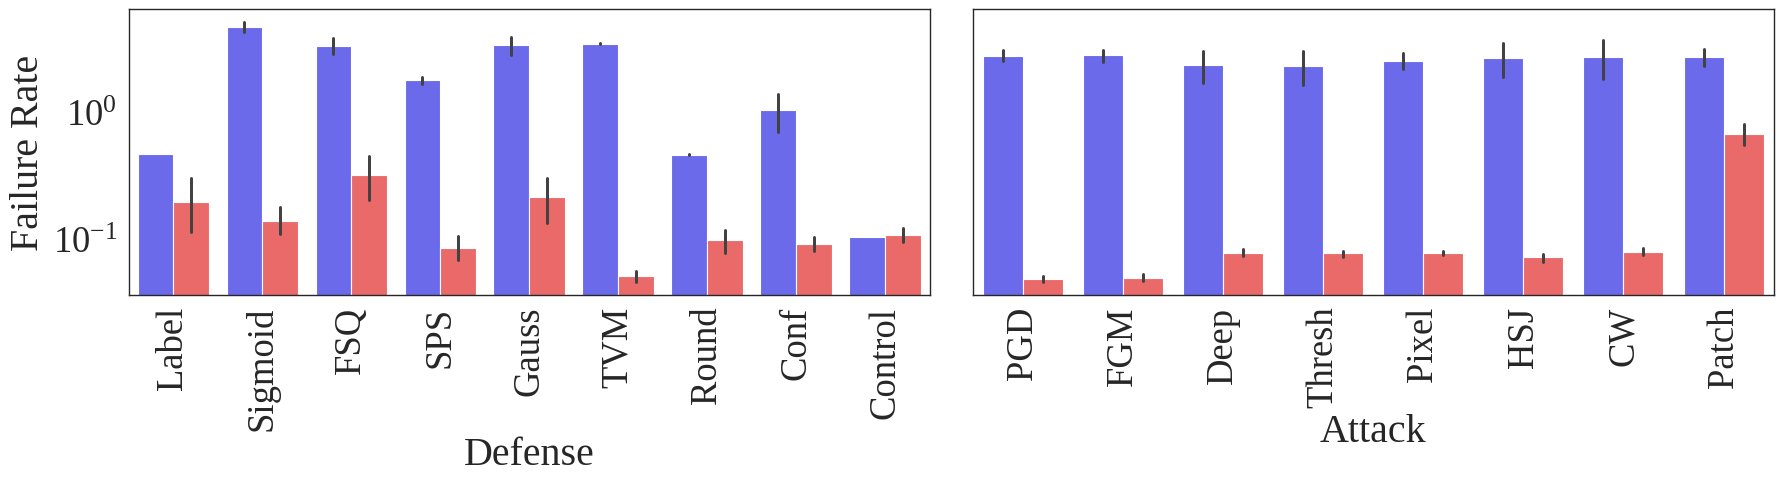

In [28]:
df['Benign Failure Rate'] = np.divide(1-df.ben_acc, df.ben_pred_time)
df['Adversarial Failure Rate'] = np.divide(1-df.adv_acc, df.adv_pred_time)
df['ben_failure_rate'] = df['Benign Failure Rate']
df['adv_failure_rate'] = df['Adversarial Failure Rate']
melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['Benign Failure Rate', 'Adversarial Failure Rate'])



fig, axs = plt.subplots(1, 2, sharey = True)
fig.figsize = (6, 40)

sns.barplot(x = 'def_gen', y = 'value', data = melted, hue = 'variable', ax = axs[0], palette = binary_palette, ci = 95)
# axs[0].set_title("Defense Type vs Accuracy")
axs[0].set_xlabel("Defense")
axs[0].set_ylabel("Failure Rate")
axs[0].legend_ = None
axs[0].set_yscale('log')
# axs[0].set_aspect(1.5)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)

sns.barplot(x = 'atk_gen', y = 'value', data = melted, hue = 'variable', ax = axs[1], palette = binary_palette, ci = 95)
# axs[1].set_title("Attack Type vs Accuracy")
axs[1].set_xlabel("Attack")
axs[1].set_ylabel("")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
axs[1].set_yscale('log')
# axs[1].set_aspect(1.5)
axs[1].legend_ = None
# axs[1].legend(loc = [1.05, .4])

# save figure
fig.set_size_inches(18.5, 5.5)
plt.tight_layout()
plt.savefig("cifar10/failure_rate_plot.eps", format = "eps")


### Training vs attack time

In [29]:
# df['ben_train_rate'] = np.multiply(df.train_time, 1-df.adv_acc) 
# df['adv_train_rate'] = np.multiply(df.attack_time, df.adv_acc)
# melted = pd.melt(df, id_vars = ['def_gen', 'atk_gen'], value_vars = ['ben_train_rate', 'adv_train_rate'])
# sns.factorplot(data = melted, x = 'def_gen', y = 'value', hue = 'variable', kind = 'bar', legend = False, height = 10, palette = binary_palette, ci = 50)
# # sns.barplot(data = adv, x = 'def_gen', y = 'value', color = 'red')
# plt.xticks(rotation =90);
# plt.yscale('log')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
# plt.tight_layout()
# sns.factorplot(data = melted, x = 'atk_gen', y = 'value', hue = 'variable', kind = 'bar', legend = False, height = 10, palette = binary_palette, ci = 50)
# # sns.barplot(data = adv, x = 'def_gen', y = 'value', color = 'red')
# plt.xticks(rotation =90);
# plt.yscale('log')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
# plt.tight_layout()
# del melted

In [30]:
control = df[df.def_name == 'Control']
assert min(control.ben_failure_rate) == max(control.ben_failure_rate)
# assert min(control.adv_failure_rate) == max(control.adv_failure_rate)
control_rate = min(control.ben_failure_rate)
df[df.def_name == 'Control'].ben_failure_rate = control_rate
adv_control_rate = np.mean(control.adv_failure_rate)
control =  df[df.def_name == 'Control']
control_acc = max(control.ben_acc)

print(control_acc)
print(control_rate)
print(adv_control_rate)

0.9886
0.10290018794718568
0.10678036760807762


/tmp/ipykernel_297808/1827726880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.def_name == 'Control'].ben_failure_rate = control_rate


### Accuracy Grid

In [31]:
import numpy as np
from pandas import Series
attacks = list(set(df.atk_name))
defenses = list(set(df.def_name))




ben_grid_acc = []
adv_grid_acc = []
gap_grid = []
ben_rate_grid = []
adv_rate_grid = []

for i in range(len(attacks)):
    
    for j in range(len(defenses)):
        tmp = df[df['atk_name'] == attacks[i]]
        
        tmp = tmp[tmp['def_name'] == defenses[j]]
        
        this = Series(np.mean(tmp.ben_acc))
        this.fillna(method = 'bfill', inplace = True)
        ben_grid_acc.append(this)
        
        that = Series(np.mean(tmp.adv_acc))
        that.fillna(method = 'bfill', inplace = True)
        adv_grid_acc.append(that)
        
        other = Series(np.mean(tmp.ben_failure_rate - tmp.adv_failure_rate))
        other.fillna(method = 'bfill', inplace = True)
        gap_grid.append(other)

        foo = Series(np.mean(tmp.ben_failure_rate))
        foo.fillna(method = 'bfill', inplace = True)
        ben_rate_grid.append(foo)

        bar = Series(np.mean(tmp.adv_failure_rate))
        bar.fillna(method='bfill', inplace = True)
        adv_rate_grid.append(bar)


ben_acc_array = np.array(ben_grid_acc)
adv_acc_array = np.array(adv_grid_acc)
gap_grid = np.array(gap_grid)
ben_rate_grid = np.array(ben_rate_grid)
adv_rate_grid = np.array(adv_rate_grid)


ben_acc_array = ben_acc_array.reshape(len(attacks), len(defenses))
adv_acc_array = adv_acc_array.reshape(len(attacks), len(defenses))
gap_grid = gap_grid.reshape(len(attacks), len(defenses))
ben_rate_grid = ben_rate_grid.reshape(len(attacks), len(defenses))
adv_rate_grid = adv_rate_grid.reshape(len(attacks), len(defenses))

assert len(ben_grid_acc) == len(adv_grid_acc)
assert len(ben_grid_acc) == len(attacks) * len(defenses)
assert gap_grid.shape == (len(attacks), len(defenses))
assert ben_rate_grid.shape == (len(attacks), len(defenses))



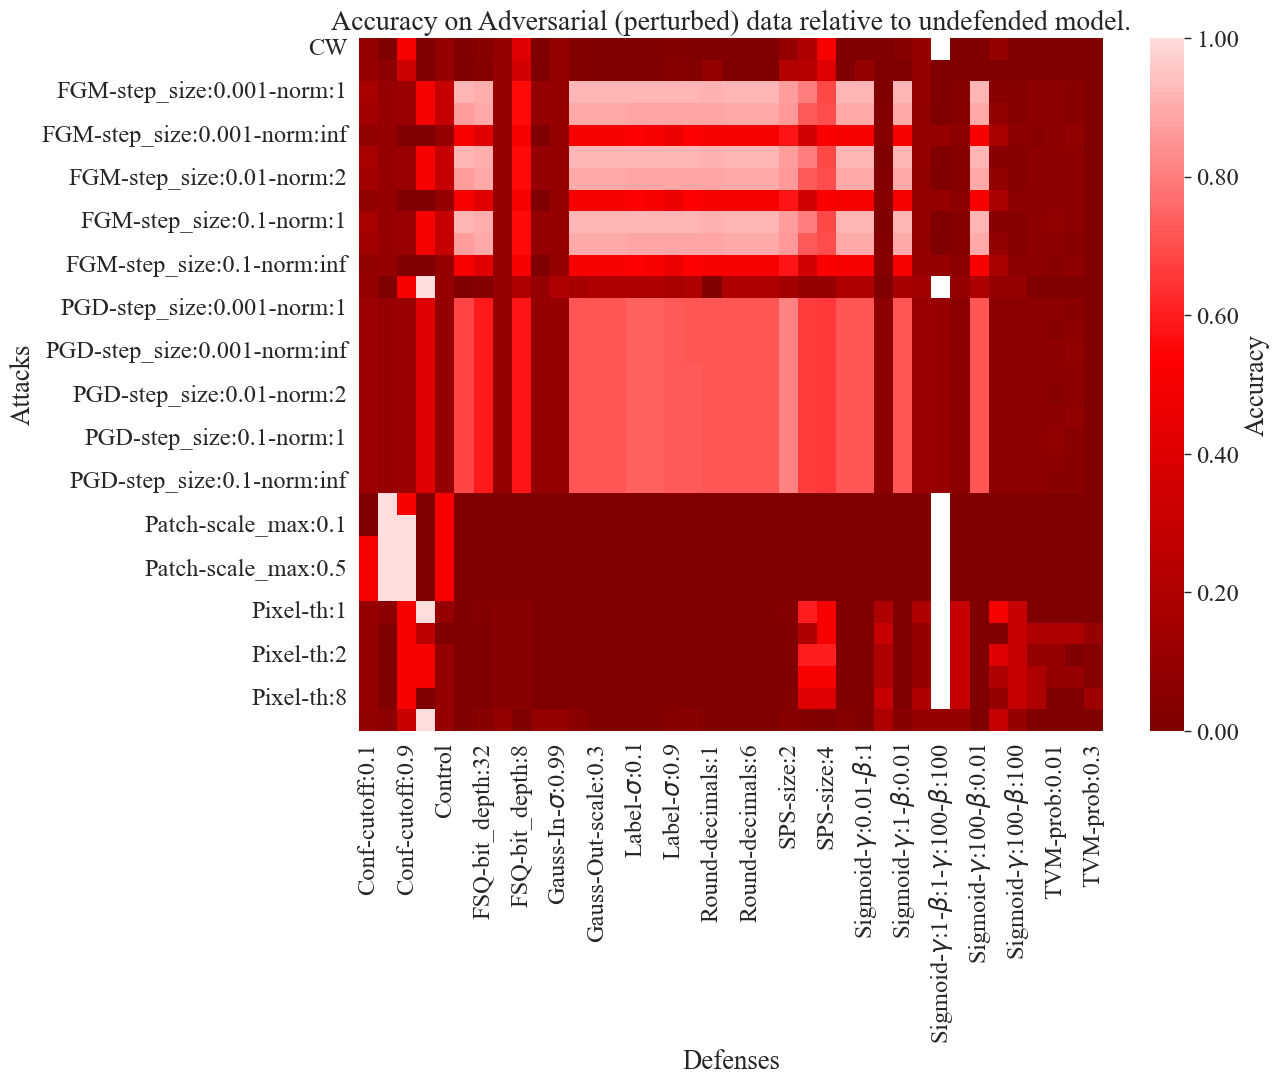

In [32]:
from matplotlib.colors import LogNorm, Normalize

def make_heatmap_from_grid(acc_array: np.ndarray, title: str, filename: str, format = 'eps', cmap = 'seismic', center = .0, norm = None, cbar_label = 'Accuracy', y_axis = True):
    adv_acc_array = pd.DataFrame(acc_array)
    # adv_acc_array.fillna(method = 'ffill', inplace = True)
    sns.set(font_scale = 2)
    sns.set(rc={'figure.figsize':(12,9)})
    sns.set_style('white', rc = {"lines.linewidth":50})
    sns.set_theme(context = 'paper', style = 'white', palette = 'coolwarm', font = 'Times New Roman', font_scale = 2)
    assert len(adv_acc_array.columns) == len(defenses)
    assert len(adv_acc_array.index) == len(attacks)
    new_defenses = []
    for defense in defenses:
        defense = str(defense).replace("beta", "$\\beta$")
        defense = str(defense).replace("gamma", "$\gamma$")
        defense = str(defense).replace("alpha", "$\\alpha$")
        defense = str(defense).replace("sigma", "$\sigma$")
        new_defenses.append(defense)
    adv_acc_array.columns = new_defenses
    adv_acc_array.index = attacks
    adv_acc_array.sort_index(axis = 1, inplace = True)
    adv_acc_array.sort_index(axis = 0, inplace = True)
    adv_acc_array = adv_acc_array.reindex(sorted(adv_acc_array.columns), axis=1)
    output = sns.heatmap((adv_acc_array), cmap = cmap, robust = True, center = center, norm = norm,  cbar_kws={'label': cbar_label, 'format': '%.2f'})
    plt.ylabel("Attacks")
    plt.xlabel("Defenses")
    plt.title(title, size = 20);
    plt.savefig(filename,  bbox_inches='tight')
    if y_axis == False:
        output.axes.yaxis.set_ticklabels([])
        plt.ylabel("")
    plt.show()
    return output
# plt.xticks(rotation = 70);

# title = "Accuracy on Benign (unperturbed) data relative to undefended model."
# filename = './archives/images/cifar10/ben_grid.eps'
# benign_chart = make_heatmap_from_grid(ben_acc_array, title, filename, center = control_acc, format = "%.1f",  y_axis = False, cmap = "seismic_r")


title = "Accuracy on Adversarial (perturbed) data relative to undefended model."
filename = './cifar10/adv_grid.eps'
adversarial_chart = make_heatmap_from_grid(adv_acc_array, title, filename, center = control_acc, cmap = 'seismic_r')


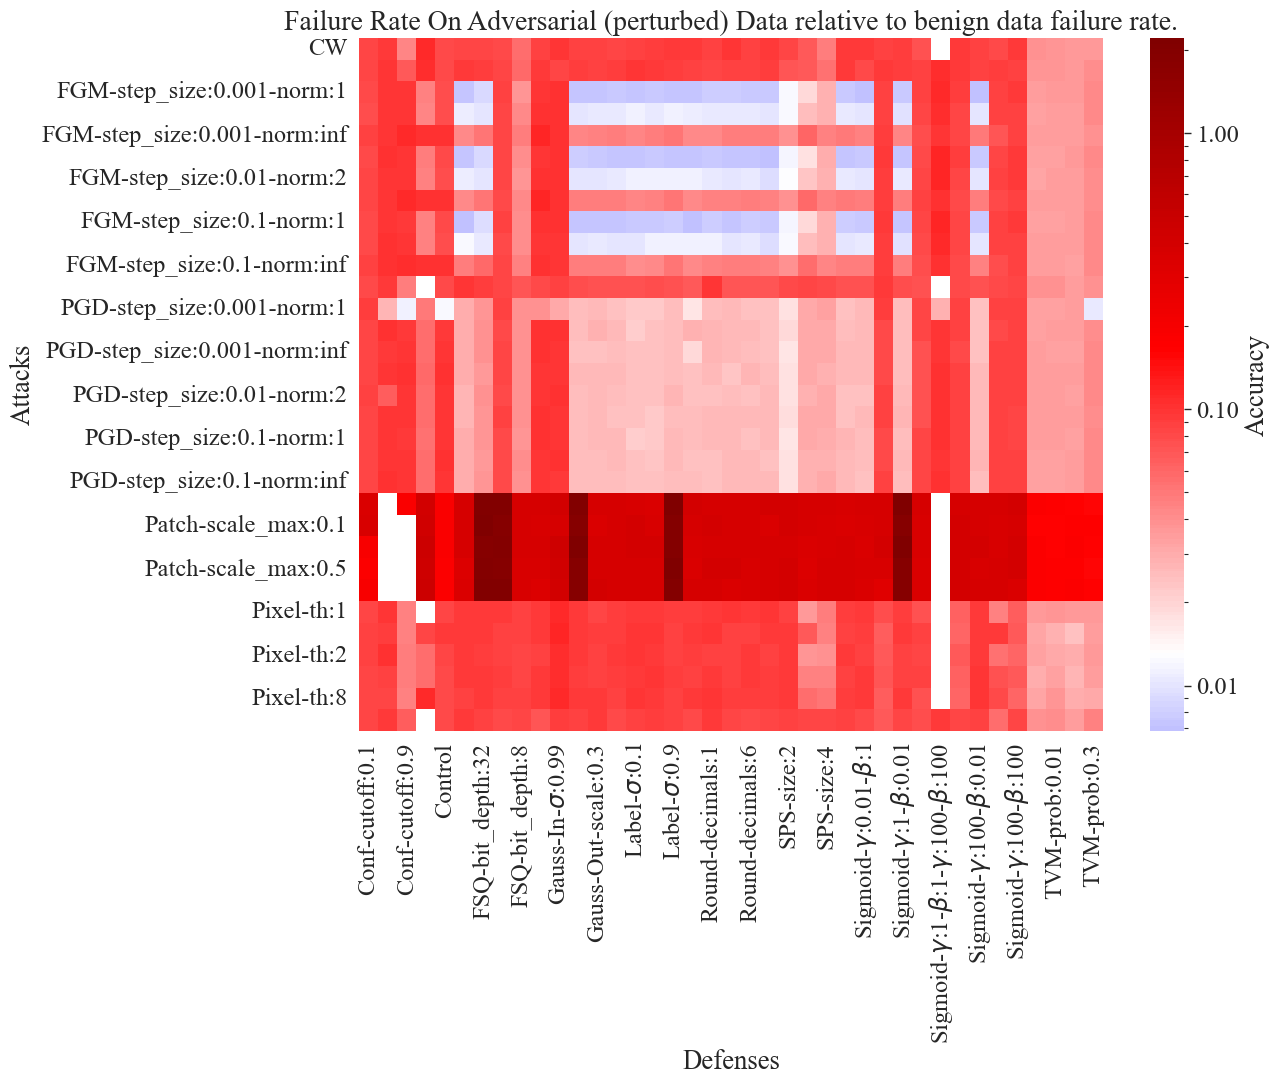

In [33]:
# title = "Failure Rate on benign examples relative to benign data failure rate."
# filename = './archives/images/cifar10/ben_rate_grid.eps'
# benign_chart = make_heatmap_from_grid(ben_rate_grid, title, filename, center = control_rate, cbar_label =  'Failure Rate Relative to Control (mislabelled samples per second)', y_axis = False, norm = LogNorm())
title = "Failure Rate On Adversarial (perturbed) Data relative to benign data failure rate."
filename = './cifar10/adv_rate_grid.eps'
adversarial_chart = make_heatmap_from_grid(adv_rate_grid, title, filename, center = control_rate, norm = LogNorm())

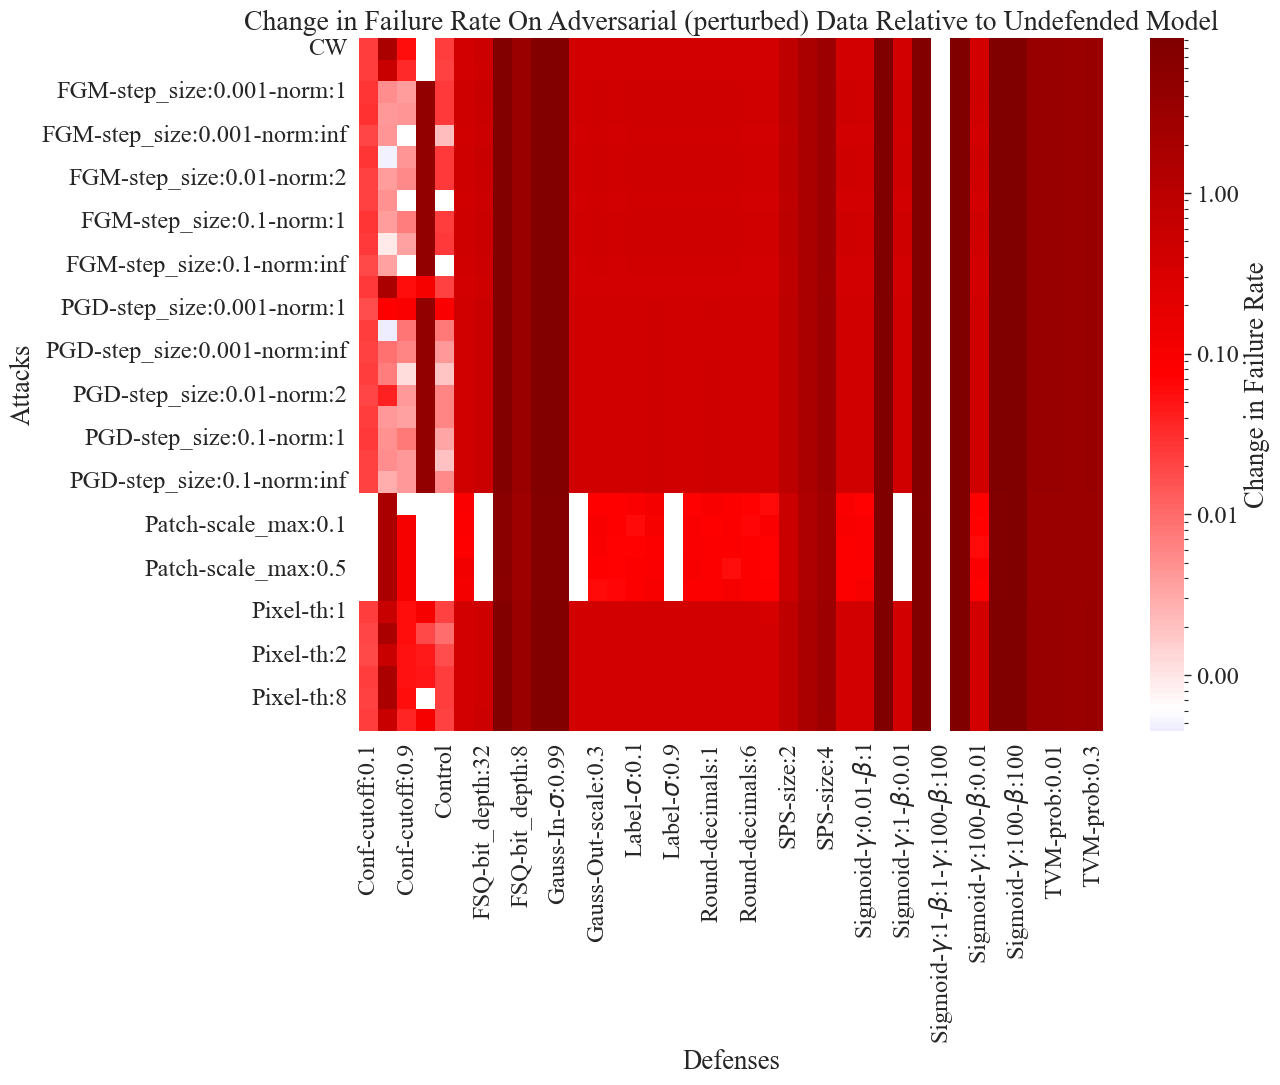

In [34]:
title = "Change in Failure Rate On Adversarial (perturbed) Data Relative to Undefended Model"
filename = './cifar10/gap_grid.eps'
rate_chart = make_heatmap_from_grid(gap_grid, title, filename, center = 0, norm = LogNorm(), cbar_label = 'Change in Failure Rate')